# Davis dataset

##  1 Read raw data from the DeepDTA

> The raw data can be downloaded from [DeepDTA Github Repository](https://github.com/hkmztrk/DeepDTA/tree/master/data).

In [1]:
import pandas as pd  # pandas for table-like data

In [2]:
davis_data = pd.read_table("../../../data/dta-datasets/Davis/DTA_Raw_Data/Davis/drug-target_interaction_affinities_Kd__Davis_et_al.2011v1.txt", sep = " ", header=None)

In [3]:
davis_data.shape  # all 68 drugs and 442 proteins make the matrix

(68, 442)

In [4]:
davis_data.head()

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
0,43.0,10000.0,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0,10000.0,10000.00,...,10000,10000,10000,10000,10000,10000.0,10000,230.0,10000.0,10000
1,10000.0,10000.0,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0,10000.0,10000.00,...,10000,10000,10000,10000,10000,10000.0,10000,2000.0,10000.0,10000
2,10000.0,75.0,1.9,13.0,0.77,13.0,2.6,31.0,34.0,0.93,...,10000,10000,10000,10000,10000,260.0,1200,120.0,2.3,10000
3,10000.0,10000.0,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0,10000.0,10000.00,...,10000,10000,10000,10000,10000,10000.0,10000,10000.0,10000.0,10000
4,10000.0,420.0,2900.0,750.0,580.00,230.0,500.0,500.0,1200.0,790.00,...,10000,10000,10000,10000,10000,10000.0,10000,10000.0,10000.0,10000


In [5]:
davis_data.describe()  # a lookup for all the data in the dataset

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,6305.710294,4786.038882,6776.396029,6157.742956,5368.200176,5076.213941,3662.326721,4603.582397,4621.454015,4351.749309,...,8199.426471,9174.279412,8509.647059,8989.588235,9681.838235,5118.126471,8046.602941,3241.946765,6886.200000,8798.838235
std,4502.267160,4755.621867,4071.977775,4317.135465,4538.166881,4586.191949,4403.584967,4605.842183,4752.974206,4717.341321,...,3384.862965,2458.183712,3181.048615,2741.635062,1683.615935,4627.492704,3430.533809,4272.287089,4264.491886,2973.932873
min,1.200000,0.047000,0.100000,0.041000,0.032000,0.019000,0.025000,0.046000,0.016000,0.037000,...,71.000000,57.000000,13.000000,24.000000,55.000000,0.300000,12.000000,0.520000,2.300000,16.000000
25%,892.500000,123.750000,2775.000000,1075.000000,632.500000,270.000000,45.000000,64.000000,59.000000,99.250000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,260.000000,7100.000000,50.250000,1775.000000,10000.000000
50%,10000.000000,2050.000000,10000.000000,10000.000000,4250.000000,2800.000000,960.000000,2500.000000,1800.000000,865.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,4350.000000,10000.000000,490.000000,10000.000000,10000.000000
75%,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
max,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000


## 2 pKd transformation

Follow the DeepDTA  we used the ${pK_d}$ as the binding affinity values, which are the regression targets for the DeepLearning Models.

In [6]:
import math
import numpy as np
def pKd_transform(data):
     return -(np.log10(data / (math.pow(10, 9))))

In [7]:
# applymap(function) will iter each item in dataframe by the function
davis_data.applymap(pKd_transform)   

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
0,7.366532,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.00000,5.0,5.0,5.000000,5.000000,6.638272,5.000000,5.000000
1,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.00000,5.0,5.0,5.000000,5.000000,5.698970,5.000000,5.000000
2,5.000000,7.124939,8.721246,7.886057,9.113509,7.886057,8.585027,7.508638,7.468521,9.031517,...,5.000000,5.000000,5.00000,5.0,5.0,6.585027,5.920819,6.920819,8.638272,5.000000
3,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.00000,5.0,5.0,5.000000,5.000000,5.000000,5.000000,5.000000
4,5.000000,6.376751,5.537602,6.124939,6.236572,6.638272,6.301030,6.301030,5.920819,6.102373,...,5.000000,5.000000,5.00000,5.0,5.0,5.000000,5.000000,5.000000,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,6.537602,8.522879,5.142668,5.677781,6.318759,6.397940,8.481486,8.508638,8.275724,8.420216,...,5.494850,5.376751,5.00000,5.0,5.0,6.327902,5.318759,7.292430,5.552842,5.000000
64,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.00000,5.0,5.0,5.795880,5.000000,5.000000,5.000000,5.000000
65,5.000000,7.886057,6.113509,6.769551,7.124939,7.481486,8.008774,7.853872,7.823909,7.744727,...,5.000000,5.000000,5.30103,5.0,5.0,6.920819,5.000000,6.008774,5.292430,5.000000
66,7.200659,7.200659,5.161151,5.585027,5.638272,6.193820,7.346787,7.309804,7.283997,7.136677,...,5.537602,5.000000,5.00000,5.0,5.0,7.096910,5.000000,8.283997,5.000000,5.455932


Then store the raw affinity matrix into a csv file.

In [8]:
davis_data.applymap(pKd_transform).to_csv('../../../data/dta-datasets/Davis/davis_affinies.csv', index=None)

## 3 Add protein ID and ligand ID

Use the DeepDTA methods to load the data.

### 3.1 Ligands ID and SMILES

Load the raw **68** ligands from DeepDTA.

In [10]:
import json
ligands = json.load(open("../../../data/dta-datasets/Davis/DTA_Raw_Data/Davis/ligands_can.txt"))

In [11]:
ligands

{'11314340': 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 '24889392': 'CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C5=C(C=C(C=C5)OCCN6CCOCC6)SC4=N3',
 '11409972': 'CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)NC3=CC=C(C=C3)OC4=NC=NC(=C4)NC)C(F)(F)F',
 '11338033': 'C1CNCCC1NC(=O)C2=C(C=NN2)NC(=O)C3=C(C=CC=C3Cl)Cl',
 '10184653': 'CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=C(C=C3)F)Cl)OC4CCOC4',
 '5287969': 'CN1CCC(C(C1)O)C2=C(C=C(C3=C2OC(=CC3=O)C4=CC=CC=C4Cl)O)O',
 '6450551': 'CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=CC=CC=N4',
 '11364421': 'CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C4)C(=O)NC5CCN(CC5)C)OC)C',
 '9926054': 'CC1=CC2=C(C=C1)N=C(C3=NC=C(N23)C)NCCN.Cl',
 '16007391': 'CCN(CCCOC1=CC2=C(C=C1)C(=NC=N2)NC3=NNC(=C3)CC(=O)NC4=CC(=CC=C4)F)CCO',
 '5328940': 'CN1CCN(CC1)CCCOC2=C(C=C3C(=C2)N=CC(=C3NC4=CC(=C(C=C4Cl)Cl)OC)C#N)OC',
 '11234052': 'CC1=CC2=C(N1)C=CC(=C2F)OC3=NC=NN4C3=C(C(=C4)OCC(C)O)C',
 '11656518': 'CN1C2=C(C=C(C=C2)OC3=CC(=NC=C3)C4=NC=C(N4)C(F)(F)F)N=C1NC5=CC=C(

In [12]:
ligands['11314340']

'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N'

In [13]:
ligands.keys()  # Pubchem ID as the keys in the dict

dict_keys(['11314340', '24889392', '11409972', '11338033', '10184653', '5287969', '6450551', '11364421', '9926054', '16007391', '5328940', '11234052', '11656518', '6918454', '156414', '9933475', '11626560', '3062316', '156422', '44150621', '176167', '176870', '42642645', '11717001', '16725726', '11617559', '123631', '5291', '4908365', '11427553', '208908', '126565', '11485656', '9929127', '11712649', '10074640', '51004351', '11667893', '9915743', '644241', '447077', '10461815', '9884685', '24180719', '25243800', '10113978', '17755052', '11984591', '153999', '25127112', '176155', '24779724', '3025986', '10138260', '10127622', '216239', '44259', '5329102', '16038120', '10427712', '16722836', '3038522', '9926791', '5494449', '3038525', '3081361', '9809715', '151194'])

In [14]:
import pandas as pd
ligands_df = pd.DataFrame(ligands, index=[0])

In [15]:
ligands_df.T.head()

,0
11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...
24889392,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...
11409972,CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)NC3=CC=C(C=C3...
11338033,C1CNCCC1NC(=O)C2=C(C=NN2)NC(=O)C3=C(C=CC=C3Cl)Cl
10184653,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...


Then store the raw ligands dataframe into a csv file.

In [22]:
ligands_df.T.to_csv('../../../data/dta-datasets/Davis/davis_ligands.csv', index_label=['PubChemID'], header=['SMILES'])

### 3.2 Protein ID and AA(Amino Acid) Sequences

Load the raw **442** proteins from DeepDTA.

In [23]:
import json
proteins = json.load(open("../../../data/dta-datasets/Davis/DTA_Raw_Data/Davis/proteins.txt"))

In [24]:
import pandas as pd
proteins_df = pd.DataFrame(proteins, index=[0])

In [25]:
proteins_df.T.head()

,0
AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...
ABL1(E255K),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...
ABL1(F317I),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...
ABL1(F317I)p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...
ABL1(F317L),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...


Then store the raw proteins dataframe into a csv file.

In [27]:
proteins_df.T.to_csv('../../../data/dta-datasets/Davis/davis_proteins.csv', index_label=['Gene'], header=['Sequence'])

## 4 Consturct the DTA pair data

Then we need to build a DataFrame with above files.   
*Drug_ID    Drug    Target_ID   Target  Y* # 5 col 

Now Read the above 3 files to get the Drug, Protein and Affinity values. But we need to be careful with the index. So I set a for loop beyond the affinity matrix to build the new DataFrame.

In [2]:
import pandas as pd
import numpy as np

In [3]:
drugs = pd.read_table("../../../data/dta-datasets/Davis/davis_ligands.csv", sep = ",")

In [5]:
drugs

,PubChemID,SMILES
0,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...
1,24889392,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...
2,11409972,CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)NC3=CC=C(C=C3...
3,11338033,C1CNCCC1NC(=O)C2=C(C=NN2)NC(=O)C3=C(C=CC=C3Cl)Cl
4,10184653,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...
...,...,...
63,5494449,CC1=CC(=NN1)NC2=NC(=NC(=C2)N3CCN(CC3)C)SC4=CC=...
64,3038525,C1=CC(=C(C(=C1)Cl)C2=C3C=CC(=NN3C=NC2=O)SC4=C(...
65,3081361,CN1CCC(CC1)COC2=C(C=C3C(=C2)N=CN=C3NC4=C(C=C(C...
66,9809715,CN1CCN(CC1)CC(=O)N(C)C2=CC=C(C=C2)NC(=C3C4=C(C...


In [6]:
drugs.loc[0]["PubChemID"]

11314340

In [7]:
drugs.loc[0]["SMILES"]

'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N'

In [8]:
targets = pd.read_table("../../../data/dta-datasets/Davis/davis_proteins.csv", sep = ",")

In [9]:
targets

,Gene,Sequence,Accession Number,Entrez Gene Symbol,PDBID,AA length,Original ID,Isoform,Original AA
0,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,NP_055726.3,AAK1,Q2M2I8,961,NaN,NaN,NaN
1,ABL1(E255K),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,NaN,NaN,NaN
2,ABL1(F317I),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,NaN,NaN,NaN
3,ABL1(F317I)p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,NaN,NaN,NaN
4,ABL1(F317L),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
437,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,NP_005424.1,YES1,P07947,543,NaN,NaN,NaN
438,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,NP_006365.2,STK25,O00506,426,NaN,NaN,NaN
439,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,NP_079328.3,YSK4,Q56UN5,1328,NaN,NaN,NaN
440,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,NP_598407.1,ZAK,Q9NYL2,800,NaN,NaN,NaN


In [10]:
targets.loc[0]["Gene"]

'AAK1'

In [11]:
affinities = pd.read_table("../../../data/dta-datasets/Davis/davis_affinies.csv",sep = ",")

In [12]:
affinities

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
0,7.366532,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.00000,5.0,5.0,5.000000,5.000000,6.638272,5.000000,5.000000
1,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.00000,5.0,5.0,5.000000,5.000000,5.698970,5.000000,5.000000
2,5.000000,7.124939,8.721246,7.886057,9.113509,7.886057,8.585027,7.508638,7.468521,9.031517,...,5.000000,5.000000,5.00000,5.0,5.0,6.585027,5.920819,6.920819,8.638272,5.000000
3,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.00000,5.0,5.0,5.000000,5.000000,5.000000,5.000000,5.000000
4,5.000000,6.376751,5.537602,6.124939,6.236572,6.638272,6.301030,6.301030,5.920819,6.102373,...,5.000000,5.000000,5.00000,5.0,5.0,5.000000,5.000000,5.000000,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,6.537602,8.522879,5.142668,5.677781,6.318759,6.397940,8.481486,8.508638,8.275724,8.420216,...,5.494850,5.376751,5.00000,5.0,5.0,6.327902,5.318759,7.292430,5.552842,5.000000
64,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.00000,5.0,5.0,5.795880,5.000000,5.000000,5.000000,5.000000
65,5.000000,7.886057,6.113509,6.769551,7.124939,7.481486,8.008774,7.853872,7.823909,7.744727,...,5.000000,5.000000,5.30103,5.0,5.0,6.920819,5.000000,6.008774,5.292430,5.000000
66,7.200659,7.200659,5.161151,5.585027,5.638272,6.193820,7.346787,7.309804,7.283997,7.136677,...,5.537602,5.000000,5.00000,5.0,5.0,7.096910,5.000000,8.283997,5.000000,5.455932


In [13]:
affinities.shape

(68, 442)

In [14]:
affinities.loc[0][0] # use the index to get the item affinity

7.366531544420414

### Loop for new DataFrame

In [16]:
davis_dataset = pd.DataFrame(columns=('Drug_ID', 'Drug', 'Target_ID', 'Target', 'Y'))  # create a new dataframe for latter append each row into

In [17]:
davis_dataset

,Drug_ID,Drug,Target_ID,Target,Y


In [18]:
for row in range(affinities.shape[0]):
    drug_id = drugs.loc[row]["PubChemID"]
    drug = drugs.loc[row]["SMILES"]
    for col in range(affinities.shape[1]):
        target_id = targets.loc[col]["Gene"]
        target = targets.loc[col]["Sequence"]
        affinity = affinities.loc[row][col]  
        davis_dataset = davis_dataset.append(pd.DataFrame({
            'Drug_ID':[drug_id],'Drug':[drug],'Target_ID':[target_id],'Target':[target], 'Y':[affinity]}), ignore_index=True)

C:\Users\Marine\AppData\Local\Temp\ipykernel_3316\3743470504.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  davis_dataset = davis_dataset.append(pd.DataFrame({


In [19]:
davis_dataset

,Drug_ID,Drug,Target_ID,Target,Y
0,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,7.366532
1,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(E255K),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000
2,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317I),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000
3,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317I)p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000
4,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317L),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000
...,...,...,...,...,...
30051,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,5.000000
30052,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,5.000000
30053,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,5.721246
30054,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,5.356547


In [20]:
davis_dataset.to_csv('../../../data/dta-datasets/Davis/davis_datasets.csv', index=False)

## 5 Visualize the Davis dataset distribution

Define the length plot function for repeative usage

### Davis

In [1]:
import pandas as pd
davis_df = pd.read_csv('../../../data/dta-datasets/Davis/davis_datasets.csv')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

def str2length(sequences):
    sequences = list(set(sequences))
    length_list = []
    for sequence in sequences:
        length_list.append(len(sequence))
    print("Min Len:", min(length_list))
    print("Max Len:", max(length_list))
    return length_list

def data_length_plot(
    length_list, dataset, plot_name, binwidth, xlabel, ylabel, x_start, x_end, y_start, y_end, color
    ):
    """
    sequences: list/pd.series of the data
    plot_name: the name of the data to be plotted
    """
    sns.displot(length_list, binwidth=binwidth, color=color)  # sns.displot(length_list, binwidth=100)
    # sns.set_style("whitegrid")
    plt.xlabel(xlabel, )
    plt.ylabel(ylabel)
    plt.xlim(x_start, x_end) 
    plt.ylim(y_start, y_end) 
    plt.title(dataset)
    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(True)
    plt.gcf().set_size_inches(4, 5)
    plt.savefig("../../../result/fig_output/datasets/Davis/" + plot_name + "Length.png") # dpi=300, , dpi=300, bbox_inches='tight'

Min Len: 288
Max Len: 2549


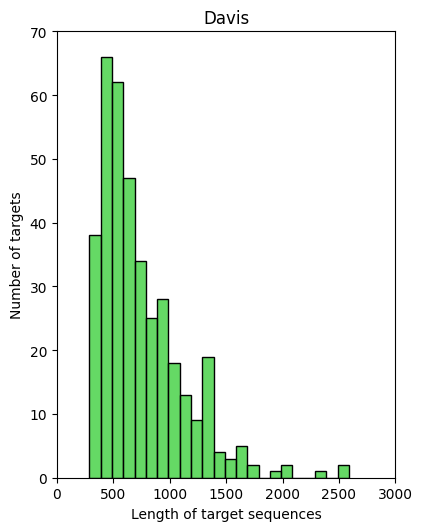

In [3]:
data_length_plot(
    length_list=str2length(davis_df["Target"]), dataset="Davis", plot_name="DavisTarget", binwidth=100, 
    xlabel="Length of target sequences", ylabel="Number of targets", 
    x_start=0, x_end=3000, y_start=0, y_end=70, color="limegreen"
    )

Min Len: 39
Max Len: 92


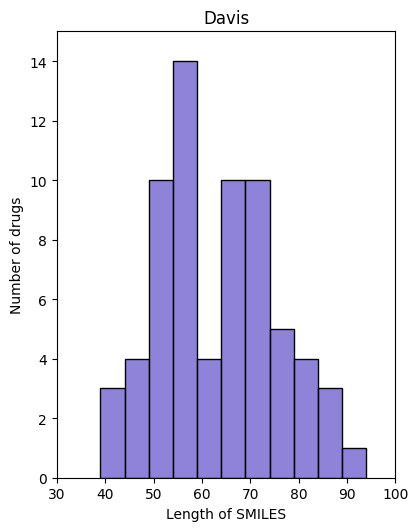

In [4]:
data_length_plot(
    length_list=str2length(davis_df["Drug"]), dataset="Davis", plot_name="DavisDrug", binwidth=5, 
    xlabel="Length of SMILES", ylabel="Number of drugs", 
    x_start=30, x_end=100, y_start=0, y_end=15, color="slateblue")

In [5]:
print(min(davis_df["Y"]))
print(max(davis_df["Y"]))

5.0
10.795880017344077


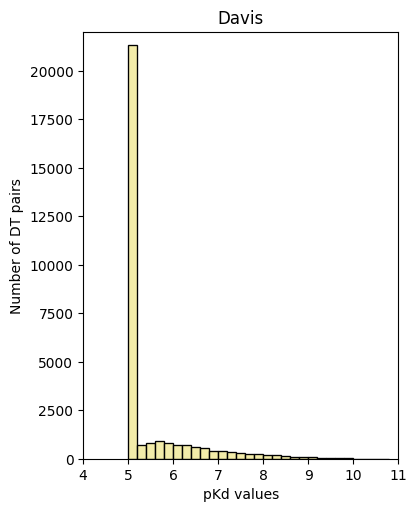

In [6]:
data_length_plot(
    length_list=davis_df["Y"],  dataset="Davis", plot_name="DavisAffinity", binwidth=0.2, 
    xlabel="pKd values", ylabel="Number of DT pairs", 
    x_start=4, x_end=11, y_start=0, y_end=22000, color="khaki")

### Filtered Davis

Define the length plot function for repeative usage

In [1]:
import pandas as pd
davis_df = pd.read_csv('../../../data/dta-datasets/Davis/davis_filtered_datasets.csv')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

def str2length(sequences):
    sequences = list(set(sequences))
    length_list = []
    for sequence in sequences:
        length_list.append(len(sequence))
    print("Min Len:", min(length_list))
    print("Max Len:", max(length_list))
    return length_list

def data_length_plot(
    length_list, dataset, plot_name, binwidth, xlabel, ylabel, x_start, x_end, y_start, y_end, color
    ):
    """
    sequences: list/pd.series of the data
    plot_name: the name of the data to be plotted
    """
    sns.displot(length_list, binwidth=binwidth, color=color)  # sns.displot(length_list, binwidth=100)
    # sns.set_style("whitegrid")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(x_start, x_end) 
    plt.ylim(y_start, y_end) 
    plt.title(dataset)
    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(True)
    plt.gcf().set_size_inches(4, 5)
    plt.savefig("../../../result/fig_output/datasets/FilteredDavis/" + plot_name + "Length.png", bbox_inches='tight') # dpi=300, , dpi=300, bbox_inches='tight'

Min Len: 288
Max Len: 2549


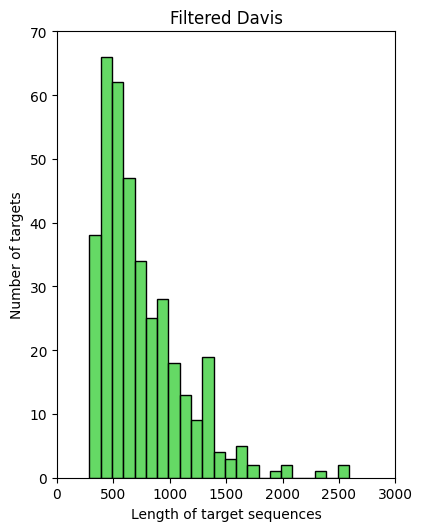

In [3]:
data_length_plot(
    length_list=str2length(davis_df["Target"]), dataset="Filtered Davis", plot_name="FilteredDavisTarget", binwidth=100, 
    xlabel="Length of target sequences", ylabel="Number of targets", 
    x_start=0, x_end=3000, y_start=0, y_end=70, color="limegreen"
    )

Min Len: 39
Max Len: 92


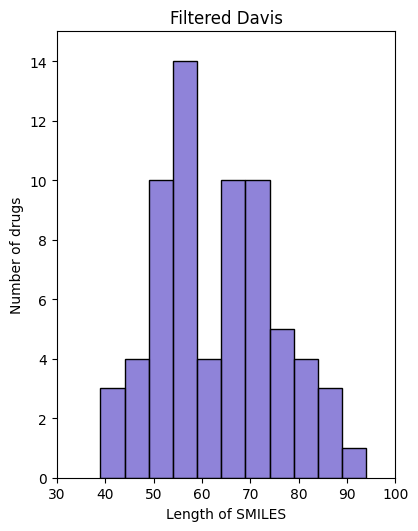

In [4]:
data_length_plot(
    length_list=str2length(davis_df["Drug"]), dataset="Filtered Davis", plot_name="FilteredDavisDrug", binwidth=5, 
    xlabel="Length of SMILES", ylabel="Number of drugs", 
    x_start=30, x_end=100, y_start=0, y_end=15, color="slateblue")

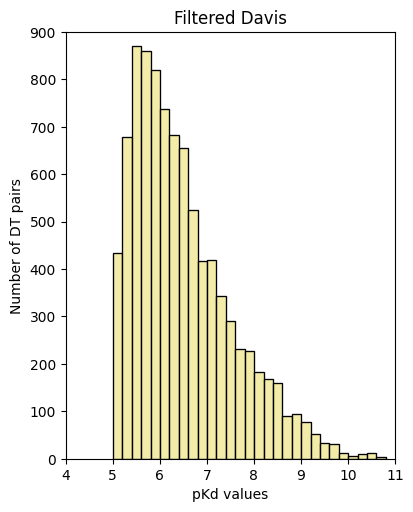

In [5]:
data_length_plot(
    length_list=davis_df["Y"],  dataset="Filtered Davis", plot_name="FilteredDavisAffinity", binwidth=0.2, 
    xlabel="pKd values", ylabel="Number of DT pairs", 
    x_start=4, x_end=11, y_start=0, y_end=900, color="khaki")

整齐输出3张图，方便对齐排列

## 6 Download the 442 protein pdb files.

> We find that all 442 proteins contain only 379 nonredundant sequences. And although the sequences are the same them may in different enviroment condations, so we still keep the different affinities values in this Davis dataset  and seperate filtered Davis will do this data cleaning. Then in the follow steps, we just follow the DeepDTA and contain all 442 proteins.

In [71]:
proteins = pd.read_table("../../../data/dta-datasets/Davis/davis_proteins.csv", sep = ",")

In [72]:
proteins.head()

,Gene,Sequence
0,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...
1,ABL1(E255K),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...
2,ABL1(F317I),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...
3,ABL1(F317I)p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...
4,ABL1(F317L),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...


In [74]:
len(proteins["Sequence"].unique())

379

Get the ID to each protein for pdb file download.

In [1]:
import pandas as pd

In [2]:
# read front 3 col for protein ID
proteinID = pd.read_excel("../../../data/dta-datasets/Davis/DTA_Raw_Data/Davis/41587_2011_BFnbt1990_MOESM5_ESM.xls", usecols="A:C")

In [3]:
proteinID.head()

,Accession Number,Entrez Gene Symbol,Kinase
0,NP_055726.3,AAK1,AAK1
1,NP_005148.2,ABL1,ABL1(E255K)-phosphorylated
2,NP_005148.2,ABL1,ABL1(F317I)-nonphosphorylated
3,NP_005148.2,ABL1,ABL1(F317I)-phosphorylated
4,NP_005148.2,ABL1,ABL1(F317L)-nonphosphorylated


Then we can get the PDB ID from the first col `Accession Number`.

In [4]:
protein_list = proteinID["Accession Number"].to_list()

In [5]:
protein_list

['NP_055726.3',
 'NP_005148.2',
 'NP_005148.2',
 'NP_005148.2',
 'NP_005148.2',
 'NP_005148.2',
 'NP_005148.2',
 'NP_005148.2',
 'NP_005148.2',
 'NP_005148.2',
 'NP_005148.2',
 'NP_005148.2',
 'NP_005148.2',
 'NP_005148.2',
 'NP_005148.2',
 'NP_005148.2',
 'NP_005149.3',
 'NP_001096.1',
 'NP_004293.1',
 'NP_001607.1',
 'NP_001097.2',
 'NP_000011.1',
 'NP_064632.2',
 'NP_079152.3',
 'NP_005154.2',
 'NP_001617.1',
 'NP_005456.1',
 'NP_004295.2',
 'BAA36547.1',
 'NP_006243.2',
 'NP_848605.1',
 'NP_055655.1',
 'NP_005914.1',
 'NP_004663.3',
 'NP_003591.2',
 'AAH00442.2',
 'AAC77369.1',
 'NP_001690.2',
 'NP_060063.2',
 'NP_001706.2',
 'NP_004320.2',
 'NP_001194.1',
 'NP_001195.2',
 'NP_001712.1',
 'NP_004324.2',
 'NP_004324.2',
 'NP_005966.1',
 'NP_115806.1',
 'NP_003948.2',
 'NP_000052.1',
 'NP_003647.1',
 'NP_065130.1',
 'NP_065172.1',
 'NP_741960.1',
 'NP_001211.3',
 'AAD20442.1',
 'NP_751913.1',
 'NP_001735.1',
 'NP_115670.1',
 'NP_006540.3',
 'NP_003679.2',
 'NP_277023.1',
 'NP_076916.

In [6]:
index_filter = proteinID["Accession Number"].str.startswith("NP_").to_list()

In [7]:
index_filter

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,


In [8]:
proteinID[proteinID["Accession Number"].str.startswith("NP_")]

,Accession Number,Entrez Gene Symbol,Kinase
0,NP_055726.3,AAK1,AAK1
1,NP_005148.2,ABL1,ABL1(E255K)-phosphorylated
2,NP_005148.2,ABL1,ABL1(F317I)-nonphosphorylated
3,NP_005148.2,ABL1,ABL1(F317I)-phosphorylated
4,NP_005148.2,ABL1,ABL1(F317L)-nonphosphorylated
...,...,...,...
437,NP_005424.1,YES1,YES
438,NP_006365.2,STK25,YSK1
439,NP_079328.3,YSK4,YSK4
440,NP_598407.1,ZAK,ZAK


Accession Number start with NP

In [9]:
proteinID[proteinID["Accession Number"].str.startswith("NP_")].loc[:, ["Accession Number", "Entrez Gene Symbol"]].to_csv("../../../data/dta-datasets/Davis/protein_accession_number.csv")

Other Accession Number

In [10]:
proteinID[~proteinID["Accession Number"].str.startswith("NP_")]  # use ~ to negate the remaining identifiers bitwise

,Accession Number,Entrez Gene Symbol,Kinase
28,BAA36547.1,PRKAA1,AMPK-alpha1
35,AAH00442.2,AURKB,AURKB
36,AAC77369.1,AURKC,AURKC
55,AAD20442.1,CAMK2D,CAMK2D
80,AAA61480.1,CLK1,CLK1
103,CAA52777.1,DDR2,DDR2
244,AAB60430.1,MERTK,MERTK
287,AAB40118.1,MAPK12,p38-gamma
295,CAA47004.1,PCTK2,PCTK2
300,XP_001349680.1,PFB0815w,PFCDPK1(P.falciparum)


Then use the Uniport `ID mapping` to transfer the RefSeq Protein Accesssion number list to UniProt Info list. (copy the whole col into the blank and choose below the From to dataset)

![UniportQuery](../../../result/fig_output/datasets/ProteinIDQuery.png)

The tool results will computed online every quickly. The you can download the file like in excel.

![UniportResult](../../../result/fig_output/datasets/ProteinIDMapping.png)

This website will automatically deduplicate the output, and here I will merge the above two parts of the results into `protein_pdb_id1.txt`.

In [12]:
protein_pdb1 = pd.read_table("../../../data/dta-datasets/Davis/protein_pdb_id1.txt", sep = "\t")

In [13]:
protein_pdb1

,RefSeq Protein Accession,UniProt Info,Unnamed: 2
0,NP_055726,AAK1_HUMAN [Acc: Q2M2I8] [Seq_length: 961] [PI...,NaN
1,NP_005148,Q59FK4_HUMAN [Acc: Q59FK4] [Seq_length: 1167] ...,NaN
2,NP_005149,ABL2_HUMAN [Acc: P42684] [Seq_length: 1182] [P...,NaN
3,NP_001096,D3DPA4_HUMAN [Acc: D3DPA4] [Seq_length: 509] [...,NaN
4,NP_004293,ACV1B_HUMAN [Acc: P36896] [Seq_length: 505] [P...,NaN
...,...,...,...
360,NP_005424,YES_HUMAN [Acc: P07947] [Seq_length: 543] [PI:...,NaN
361,NP_006365,STK25_HUMAN [Acc: O00506] [Seq_length: 426] [P...,NaN
362,NP_079328,M3K19_HUMAN [Acc: Q56UN5] [Seq_length: 1328] [...,NaN
363,NP_598407,M3K20_HUMAN [Acc: Q9NYL2] [Seq_length: 800] [P...,NaN


For example, in `[Acc: Q2M2I8]` the Q2M2I8 is the corresponding PDB ID with the Protein `NP_055726`. We the further clean these output file with only the PDB ID.

In [14]:
protein_pdb1.columns = ["RefSeq Protein Accession", "UniProt Info", "PDB ID"] 

In [15]:
protein_pdb1.head()

,RefSeq Protein Accession,UniProt Info,PDB ID
0,NP_055726,AAK1_HUMAN [Acc: Q2M2I8] [Seq_length: 961] [PI...,NaN
1,NP_005148,Q59FK4_HUMAN [Acc: Q59FK4] [Seq_length: 1167] ...,NaN
2,NP_005149,ABL2_HUMAN [Acc: P42684] [Seq_length: 1182] [P...,NaN
3,NP_001096,D3DPA4_HUMAN [Acc: D3DPA4] [Seq_length: 509] [...,NaN
4,NP_004293,ACV1B_HUMAN [Acc: P36896] [Seq_length: 505] [P...,NaN


Seperate all the string in `Info` col to get the PDB ID.

In [16]:
new_df = protein_pdb1["UniProt Info"].str.split(' ', expand=True)

In [17]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,AAK1_HUMAN,[Acc:,Q2M2I8],[Seq_length:,961],[PI:,6.16],[Weight:,103884.3],[Organism:,...,None,None,None,None,None,None,None,None,None,None
1,Q59FK4_HUMAN,[Acc:,Q59FK4],[Seq_length:,1167],[PI:,8.99],[Weight:,127256.37],[Organism:,...,None,None,None,None,None,None,None,None,None,None
2,ABL2_HUMAN,[Acc:,P42684],[Seq_length:,1182],[PI:,8.31],[Weight:,128341.93],[Organism:,...,None,None,None,None,None,None,None,None,None,None
3,D3DPA4_HUMAN,[Acc:,D3DPA4],[Seq_length:,509],[PI:,7.12],[Weight:,57152.41],[Organism:,...,None,None,None,None,None,None,None,None,None,None
4,ACV1B_HUMAN,[Acc:,P36896],[Seq_length:,505],[PI:,6.6],[Weight:,56806.05],[Organism:,...,None,None,None,None,None,None,None,None,None,None


In [18]:
protein_df = pd.merge(protein_pdb1["RefSeq Protein Accession"], new_df, left_index=True, right_index=True)

In [19]:
protein_df.head()

,RefSeq Protein Accession,0,1,2,3,4,5,6,7,8,...,177,178,179,180,181,182,183,184,185,186
0,NP_055726,AAK1_HUMAN,[Acc:,Q2M2I8],[Seq_length:,961],[PI:,6.16],[Weight:,103884.3],...,None,None,None,None,None,None,None,None,None,None
1,NP_005148,Q59FK4_HUMAN,[Acc:,Q59FK4],[Seq_length:,1167],[PI:,8.99],[Weight:,127256.37],...,None,None,None,None,None,None,None,None,None,None
2,NP_005149,ABL2_HUMAN,[Acc:,P42684],[Seq_length:,1182],[PI:,8.31],[Weight:,128341.93],...,None,None,None,None,None,None,None,None,None,None
3,NP_001096,D3DPA4_HUMAN,[Acc:,D3DPA4],[Seq_length:,509],[PI:,7.12],[Weight:,57152.41],...,None,None,None,None,None,None,None,None,None,None
4,NP_004293,ACV1B_HUMAN,[Acc:,P36896],[Seq_length:,505],[PI:,6.6],[Weight:,56806.05],...,None,None,None,None,None,None,None,None,None,None


In [20]:
protein_df.loc[:, 0][0][:-6]

'AAK1'

In [21]:
for line in range(protein_df.shape[0]):
     protein_df.loc[:, 0][line] = protein_df.loc[:, 0][line][:-6]
     if protein_df.loc[:, 2][line] is not None:
          protein_df.loc[:, 2][line] = protein_df.loc[:, 2][line][:-1]

In [22]:
protein_df.head()

,RefSeq Protein Accession,0,1,2,3,4,5,6,7,8,...,177,178,179,180,181,182,183,184,185,186
0,NP_055726,AAK1,[Acc:,Q2M2I8,[Seq_length:,961],[PI:,6.16],[Weight:,103884.3],...,None,None,None,None,None,None,None,None,None,None
1,NP_005148,Q59FK4,[Acc:,Q59FK4,[Seq_length:,1167],[PI:,8.99],[Weight:,127256.37],...,None,None,None,None,None,None,None,None,None,None
2,NP_005149,ABL2,[Acc:,P42684,[Seq_length:,1182],[PI:,8.31],[Weight:,128341.93],...,None,None,None,None,None,None,None,None,None,None
3,NP_001096,D3DPA4,[Acc:,D3DPA4,[Seq_length:,509],[PI:,7.12],[Weight:,57152.41],...,None,None,None,None,None,None,None,None,None,None
4,NP_004293,ACV1B,[Acc:,P36896,[Seq_length:,505],[PI:,6.6],[Weight:,56806.05],...,None,None,None,None,None,None,None,None,None,None


In [23]:
protein_df.loc[:][2].to_list()

['Q2M2I8',
 'Q59FK4',
 'P42684',
 'D3DPA4',
 'P36896',
 'P27037',
 'Q13705',
 'P37023',
 'Q8NI60',
 'Q96D53',
 'B0LPE5',
 'P31751',
 'Q9Y243',
 'Q9UM73',
 'P54646',
 'Q8NFD2',
 'A0A024RBL3',
 'Q99683',
 'O95382',
 'O14965',
 'P30530',
 'Q9NSY1',
 'P51451',
 'P36894',
 'O00238',
 'Q13873',
 'P51813',
 'P15056',
 'Q13882',
 'Q8TDC3',
 'Q8IWQ3',
 'Q06187',
 'Q14012',
 'Q5SQQ7',
 'Q96NX5',
 'Q9UQM7',
 'Q13554',
 'Q13555',
 'Q16566',
 'Q8N5S9',
 'Q96RR4',
 'O14936',
 None,
 'Q4VBY6',
 'A0A024RA85',
 'Q9BWU1',
 'P24941',
 'Q00526',
 'A0A024RBB6',
 'Q00535',
 'A0A0S2Z3F9',
 'P49336',
 'P50750',
 'Q00532',
 'B4DH08',
 'Q8IVW4',
 'O76039',
 'O14757',
 'O96017',
 'O14578',
 'P49760',
 'P49761',
 'Q9HAZ1',
 'P07333',
 'B2R6Q4',
 'P48729',
 'Q8N752',
 'P48730',
 'P49674',
 'A0A024R5W3',
 'P78368',
 'Q9Y6M4',
 'P68400',
 'P19784',
 'P42679',
 'P53355',
 'A0A024R603',
 'B3KNJ3',
 'O15075',
 'Q8N568',
 'Q9C098',
 'A0A024RCQ1',
 'Q12852',
 'Q09013',
 'Q6DT37',
 'Q9UEE5',
 'O94768',
 None,
 'Q9Y463',
 

In [24]:
protein_df.loc[1][0]

'Q59FK4'

Maping the Accession Number to PDB ID.

In [25]:
gene_pdb_dict = {}
for i in range(protein_df.shape[0]):
    key = protein_df.loc[i]["RefSeq Protein Accession"]
    value = protein_df.loc[i][2]
    if value is not None:
        gene_pdb_dict.update({key: value})

In [26]:
gene_pdb_dict

{'NP_055726': 'Q2M2I8',
 'NP_005148': 'Q59FK4',
 'NP_005149': 'P42684',
 'NP_001096': 'D3DPA4',
 'NP_004293': 'P36896',
 'NP_001607': 'P27037',
 'NP_001097': 'Q13705',
 'NP_000011': 'P37023',
 'NP_064632': 'Q8NI60',
 'NP_079152': 'Q96D53',
 'NP_005154': 'B0LPE5',
 'NP_001617': 'P31751',
 'NP_005456': 'Q9Y243',
 'NP_004295': 'Q9UM73',
 'NP_006243': 'P54646',
 'NP_848605': 'Q8NFD2',
 'NP_055655': 'A0A024RBL3',
 'NP_005914': 'Q99683',
 'NP_004663': 'O95382',
 'NP_003591': 'O14965',
 'NP_001690': 'P30530',
 'NP_060063': 'Q9NSY1',
 'NP_001706': 'P51451',
 'NP_004320': 'P36894',
 'NP_001194': 'O00238',
 'NP_001195': 'Q13873',
 'NP_001712': 'P51813',
 'NP_004324': 'P15056',
 'NP_005966': 'Q13882',
 'NP_115806': 'Q8TDC3',
 'NP_003948': 'Q8IWQ3',
 'NP_000052': 'Q06187',
 'NP_003647': 'Q14012',
 'NP_065130': 'Q5SQQ7',
 'NP_065172': 'Q96NX5',
 'NP_741960': 'Q9UQM7',
 'NP_001211': 'Q13554',
 'NP_751913': 'Q13555',
 'NP_001735': 'Q16566',
 'NP_115670': 'Q8N5S9',
 'NP_006540': 'Q96RR4',
 'NP_003679'

You need to get uniprotID to download the corresponding PDBfile from AlphaFold Database. For example, genotype AAK1 corresponds to PDB ID Q2M2I8.

> PDB file in AlphaFold format with v4 version like：https://alphafold.ebi.ac.uk/files/AF-Q2M2I8-F1-model_v4.pdb

In [39]:
# read front 3 col for protein ID
proteinID = pd.read_excel("../../../data/dta-datasets/Davis/DTA_Raw_Data/Davis/41587_2011_BFnbt1990_MOESM5_ESM.xls", usecols="A:C")

In [40]:
proteinID.head()

,Accession Number,Entrez Gene Symbol,Kinase
0,NP_055726.3,AAK1,AAK1
1,NP_005148.2,ABL1,ABL1(E255K)-phosphorylated
2,NP_005148.2,ABL1,ABL1(F317I)-nonphosphorylated
3,NP_005148.2,ABL1,ABL1(F317I)-phosphorylated
4,NP_005148.2,ABL1,ABL1(F317L)-nonphosphorylated


Empety the third col to contain PDBID

In [41]:
proteinID.rename(columns={"Kinase": "PDBID"}, inplace=True)

In [42]:
proteinID["PDBID"] = ' ' 

In [43]:
proteinID.head()

,Accession Number,Entrez Gene Symbol,PDBID
0,NP_055726.3,AAK1,
1,NP_005148.2,ABL1,
2,NP_005148.2,ABL1,
3,NP_005148.2,ABL1,
4,NP_005148.2,ABL1,


In [44]:
proteinID.loc[0]["Accession Number"][:-2]  # get the int part

'NP_055726'

In [45]:
gene_pdb_dict[proteinID.loc[0]["Accession Number"][:-2]]  # get the dict for mapping

'Q2M2I8'

In [46]:
proteinID.loc[0]["Accession Number"][:-2] in gene_pdb_dict.keys()

True

In [47]:
for line in range(proteinID.shape[0]):
    if proteinID.loc[line]["Accession Number"][:-2] in gene_pdb_dict.keys():
        proteinID.loc[line]["PDBID"] = gene_pdb_dict[proteinID.loc[line]["Accession Number"][:-2]]

In [48]:
proteinID.head()

,Accession Number,Entrez Gene Symbol,PDBID
0,NP_055726.3,AAK1,Q2M2I8
1,NP_005148.2,ABL1,Q59FK4
2,NP_005148.2,ABL1,Q59FK4
3,NP_005148.2,ABL1,Q59FK4
4,NP_005148.2,ABL1,Q59FK4


In [50]:
proteinID.to_csv("../../../data/dta-datasets/Davis/protein_pdb.csv", index=False)

The else 23 empty PDBIDs need to be collected from [Uniport](https://www.uniprot.org/).   
And I double check the PDB ID with the AA Sequence from the Uniport, only the reviewed PDB are considered. So some PDB start without `O` `P` `Q` like `A0` or `B4`, I replace them with the reviewed version and a flag col is added by hand. And raw davis sequence may not fit the PDB sequence from Uniport, in this case I choose to trust the Uniport. So the AA sequence may be a little with the raw dataset form DeepDTA.

Problem List:
- **isoforms**: (different AA Sequences, but only the main isoform(-1 type) get the full-lenght AlphaFold PDB). Like ABL2, the main Protein P42684-1 is different with P42684-3 by the 1-52 AA. The raw data AA Sequence is the P42684-3, but none PDB report with this isoform.
    Method: As the isoforms the differences from canonical normaly do not fall into the pocket part, I recommand just replace all the isoforms with the canonical conterpart.
- **TrEMBL**: if no other reviewed PDB are founded, I choose the TrEMBL version with the AA sequence equals rather than the reviewed version with sub AA sequence different, while may influence the interaction without enough evidence.

![P42684](../../../result/fig_output/datasets/P42684-3.png)

Test Zone for two AA sequence

In [103]:
len('MPARIGYYEIDRTIGKGNFAVVKRATHLVTKAKVAIKIIDKTQLDEENLKKIFREVQIMKMLCHPHIIRLYQVMETERMIYLVTEYASGGEIFDHLVAHGRMAEKEARRKFKQIVTAVYFCHCRNIVHRDLKAENLLLDANLNIKIADFGFSNLFTPGQLLKTWCGSPPYAAPELFEGKEYDGPKVDIWSLGVVLYVLVCGALPFDGSTLQNLRARVLSGKFRIPFFMSTECEHLIRHMLVLDPNKRLSMEQICKHKWMKLGDADPNFDRLIAECQQLKEERQVDPLNEDVLLAMEDMGLDKEQTLQSLRSDAYDHYSAIYSLLCDRHKRHKTLRLGALPSMPRALAFQAPVNIQAEQAGTAMNISVPQVQLINPENQIVEPDGTLNLDSDEGEEPSPEALVRYLSMRRHTVGVADPRTEVMEDLQKLLPGFPGVNPQAPFLQVAPNVNFMHNLLPMQNLQPTGQLEYKEQSLLQPPTLQLLNGMGPLGRRASDGGANIQLHAQQLLKRPRGPSPLVTMTPAVPAVTPVDEESSDGEPDQEAVQSSTYKDSNTLHLPTERFSPVRRFSDGAASIQAFKAHLEKMGNNSSIKQLQQECEQLQKMYGGQIDERTLEKTQQQHMLYQQEQHHQILQQQIQDSICPPQPSPPLQAACENQPALLTHQLQRLRIQPSSPPPNHPNNHLFRQPSNSPPPMSSAMIQPHGAASSSQFQGLPSRSAIFQQQPENCSSPPNVALTCLGMQQPAQSQQVTIQVQEPVDMLSNMPGTAAGSSGRGISISPSAGQMQMQHRTNLMATLSYGHRPLSKQLSADSAEAHSLNVNRFSPANYDQAHLHPHLFSDQSRGSPSSYSPSTGVGFSPTQALKVPPLDQFPTFPPSAHQQPPHYTTSALQQALLSPTPPDYTRHQQVPHILQGLLSPRHSLTGHSDIRLPPTEFAQLIKRQQQQRQQQQQQQQQQEYQELFRHMNQGDAGSLAPSLGGQSMTERQALSYQNADSYHHHTSPQHLLQIRAQECVSQASSPTPPHGYAHQPALMHSESMEEDCSCEGAKDGFQDSKSSSTLTKGCHDSPLLLSTGGPGDPESLLGTVSHAQELGIHPYGHQPTAAFSKNKVPSREPVIGNCMDRSSPGQAVELPDHNGLGYPARPSVHEHHRPRALQRHHTIQNSDDAYVQLDNLPGMSLVAGKALSSARMSDAVLSQSSLMGSQQFQDGENEECGASLGGHEHPDLSDGSQHLNSSCYPSTCITDILLSYKHPEVSFSMEQAGV')

1263

In [121]:
stringA = 'MPARIGYYEIDRTIGKGNFAVVKRATHLVTKAKVAIKIIDKTQLDEENLKKIFREVQIMKMLCHPHIIRLYQVMETERMIYLVTEYASGGEIFDHLVAHGRMAEKEARRKFKQIVTAVYFCHCRNIVHRDLKAENLLLDANLNIKIADFGFSNLFTPGQLLKTWCGSPPYAAPELFEGKEYDGPKVDIWSLGVVLYVLVCGALPFDGSTLQNLRARVLSGKFRIPFFMSTECEHLIRHMLVLDPNKRLSMEQICKHKWMKLGDADPNFDRLIAECQQLKEERQVDPLNEDVLLAMEDMGLDKEQTLQSLRSDAYDHYSAIYSLLCDRHKRHKTLRLGALPSMPRALAFQAPVNIQAEQAGTAMNISVPQVQLINPENQIVEPDGTLNLDSDEGEEPSPEALVRYLSMRRHTVGVADPRTEVMEDLQKLLPGFPGVNPQAPFLQVAPNVNFMHNLLPMQNLQPTGQLEYKEQSLLQPPTLQLLNGMGPLGRRASDGGANIQLHAQQLLKRPRGPSPLVTMTPAVPAVTPVDEESSDGEPDQEAVQSSTYKDSNTLHLPTERFSPVRRFSDGAASIQAFKAHLEKMGNNSSIKQLQQECEQLQKMYGGQIDERTLEKTQQQHMLYQQEQHHQILQQQIQDSICPPQPSPPLQAACENQPALLTHQLQRLRIQPSSPPPNHPNNHLFRQPSNSPPPMSSAMIQPHGAASSSQFQGLPSRSAIFQQQPENCSSPPNVALTCLGMQQPAQSQQVTIQVQEPVDMLSNMPGTAAGSSGRGISISPSAGQMQMQHRTNLMATLSYGHRPLSKQLSADSAEAHSLNVNRFSPANYDQAHLHPHLFSDQSRGSPSSYSPSTGVGFSPTQALKVPPLDQFPTFPPSAHQQPPHYTTSALQQALLSPTPPDYTRHQQVPHILQGLLSPRHSLTGHSDIRLPPTEFAQLIKRQQQQRQQQQQQQQQQEYQELFRHMNQGDAGSLAPSLGGQSMTERQALSYQNADSYHHHTSPQHLLQIRAQECVSQASSPTPPHGYAHQPALMHSESMEEDCSCEGAKDGFQDSKSSSTLTKGCHDSPLLLSTGGPGDPESLLGTVSHAQELGIHPYGHQPTAAFSKNKVPSREPVIGNCMDRSSPGQAVELPDHNGLGYPARPSVHEHHRPRALQRHHTIQNSDDAYVQLDNLPGMSLVAGKALSSARMSDAVLSQSSLMGSQQFQDGENEECGASLGGHEHPDLSDGSQHLNSSCYPSTCITDILLSYKHPEVSFSMEQAGV'

In [122]:
stringB = 'MAAAAASGAGGAAGAGTGGAGPAGRLLPPPAPGSPAAPAAVSPAAGQPRPPAPASRGPMPARIGYYEIDRTIGKGNFAVVKRATHLVTKAKVAIKIIDKTQLDEENLKKIFREVQIMKMLCHPHIIRLYQVMETERMIYLVTEYASGGEIFDHLVAHGRMAEKEARRKFKQIVTAVYFCHCRNIVHRDLKAENLLLDANLNIKIADFGFSNLFTPGQLLKTWCGSPPYAAPELFEGKEYDGPKVDIWSLGVVLYVLVCGALPFDGSTLQNLRARVLSGKFRIPFFMSTECEHLIRHMLVLDPNKRLSMEQICKHKWMKLGDADPNFDRLIAECQQLKEERQVDPLNEDVLLAMEDMGLDKEQTLQSLRSDAYDHYSAIYSLLCDRHKRHKTLRLGALPSMPRALAFQAPVNIQAEQAGTAMNISVPQVQLINPENQIVEPDGTLNLDSDEGEEPSPEALVRYLSMRRHTVGVADPRTEVMEDLQKLLPGFPGVNPQAPFLQVAPNVNFMHNLLPMQNLQPTGQLEYKEQSLLQPPTLQLLNGMGPLGRRASDGGANIQLHAQQLLKRPRGPSPLVTMTPAVPAVTPVDEESSDGEPDQEAVQSSTYKDSNTLHLPTERFSPVRRFSDGAASIQAFKAHLEKMGNNSSIKQLQQECEQLQKMYGGQIDERTLEKTQQQHMLYQQEQHHQILQQQIQDSICPPQPSPPLQAACENQPALLTHQLQRLRIQPSSPPPNHPNNHLFRQPSNSPPPMSSAMIQPHGAASSSQFQGLPSRSAIFQQQPENCSSPPNVALTCLGMQQPAQSQQVTIQVQEPVDMLSNMPGTAAGSSGRGISISPSAGQMQMQHRTNLMATLSYGHRPLSKQLSADSAEAHSLNVNRFSPANYDQAHLHPHLFSDQSRGSPSSYSPSTGVGFSPTQALKVPPLDQFPTFPPSAHQQPPHYTTSALQQALLSPTPPDYTRHQQVPHILQGLLSPRHSLTGHSDIRLPPTEFAQLIKRQQQQRQQQQQQQQQQEYQELFRHMNQGDAGSLAPSLGGQSMTERQALSYQNADSYHHHTSPQHLLQIRAQECVSQASSPTPPHGYAHQPALMHSESMEEDCSCEGAKDGFQDSKSSSTLTKGCHDSPLLLSTGGPGDPESLLGTVSHAQELGIHPYGHQPTAAFSKNKVPSREPVIGNCMDRSSPGQAVELPDHNGLGYPARPSVHEHHRPRALQRHHTIQNSDDAYVQLDNLPGMSLVAGKALSSARMSDAVLSQSSLMGSQQFQDGENEECGASLGGHEHPDLSDGSQHLNSSCYPSTCITDILLSYKHPEVSFSMEQAGV'

In [101]:
stringA == stringB

True

In [123]:
stringB.find(stringA)

58

With the end of manual cleaning, the documents were obtained by `davis_proteins.csv`.

In [124]:
pdb_df = pd.read_csv('../../../data/dta-datasets/Davis/davis_proteins.csv')

In [125]:
pdb_df.head()

,Gene,Sequence,Accession Number,Entrez Gene Symbol,PDBID,AA length,Original ID,Isoform,Original AA
0,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,NP_055726.3,AAK1,Q2M2I8,961,NaN,NaN,NaN
1,ABL1(E255K),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,NaN,NaN,NaN
2,ABL1(F317I),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,NaN,NaN,NaN
3,ABL1(F317I)p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,NaN,NaN,NaN
4,ABL1(F317L),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,NaN,NaN,NaN


In [126]:
pdb_list = pdb_df["PDBID"].to_list()

In [127]:
pdb_list

['Q2M2I8',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'P42684',
 'Q04771',
 'P36896',
 'P27037',
 'Q13705',
 'P37023',
 'Q8NI60',
 'Q96D53',
 'P31749',
 'P31751',
 'Q9Y243',
 'Q9UM73',
 'Q13131',
 'P54646',
 'Q8NFD2',
 'O60285',
 'Q99683',
 'O95382',
 'O14965',
 'Q96GD4',
 'Q9UQB9',
 'P30530',
 'Q9NSY1',
 'Q05D26',
 'P36894',
 'O00238',
 'Q13873',
 'P51813',
 'P15056',
 'P15056',
 'Q13882',
 'Q8TDC3',
 'Q8IWQ3',
 'Q5JY90',
 'Q14012',
 'Q8IU85',
 'Q96NX5',
 'Q9UQM7',
 'Q13554',
 'Q13557',
 'Q13555',
 'Q16566',
 'Q8N5S9',
 'Q96RR4',
 'O14936',
 'A4VCI5',
 'Q4VBY6',
 'Q9BVE2',
 'Q9BWU1',
 'P24941',
 'Q00526',
 'P11802',
 'P11802',
 'Q00535',
 'P50613',
 'P49336',
 'P50750',
 'Q00532',
 'Q92772',
 'Q8IVW4',
 'O76039',
 'O14757',
 'O96017',
 'O14578',
 'P49759',
 'P49760',
 'P49761',
 'Q9HAZ1',
 'P07333',
 'P41240',
 'P48729',
 'Q8N752',
 'P48730',
 'P49674',
 'Q9HCP0',

In [128]:
len(pdb_list)

442

In [129]:
len(set(pdb_list))

379

In [130]:
prefix = 'https://alphafold.ebi.ac.uk/files/AF-'
suffix = '-F1-model_v4.pdb'

Start download!

In [131]:
import os
from torchdrug import utils
urls = []
path = '../../../data/dta-datasets/Davis/pdb/'
for item in range(len(pdb_list)):
    url = prefix + pdb_list[item] + suffix
    pdb_name = "AF-" + pdb_list[item] + suffix
    pdb_file = os.path.join(path, pdb_name)
    if os.path.exists(pdb_file):
        print("==================== Using the pdb file: ", pdb_file, "====================")
    else:
        if url not in urls:
            urls.append(url)
            # print(url)
            try:
                utils.download(url, path)
            except:
                print(f'This url: {url} can not be downloaded')

19:58:16   Downloading https://alphafold.ebi.ac.uk/files/AF-Q2M2I8-F1-model_v4.pdb to ../../../data/dta-datasets/Davis/pdb/AF-Q2M2I8-F1-model_v4.pdb
19:58:17   Downloading https://alphafold.ebi.ac.uk/files/AF-Q59FK4-F1-model_v4.pdb to ../../../data/dta-datasets/Davis/pdb/AF-Q59FK4-F1-model_v4.pdb
==================== Using the pdb file:  ../../../data/dta-datasets/Davis/pdb/AF-Q59FK4-F1-model_v4.pdb ====================
==================== Using the pdb file:  ../../../data/dta-datasets/Davis/pdb/AF-Q59FK4-F1-model_v4.pdb ====================
==================== Using the pdb file:  ../../../data/dta-datasets/Davis/pdb/AF-Q59FK4-F1-model_v4.pdb ====================
==================== Using the pdb file:  ../../../data/dta-datasets/Davis/pdb/AF-Q59FK4-F1-model_v4.pdb ====================
==================== Using the pdb file:  ../../../data/dta-datasets/Davis/pdb/AF-Q59FK4-F1-model_v4.pdb ====================
==================== Using the pdb file:  ../../../data/dta-datasets/Dav

## 7 Build the new Davis dataset

### Merge the DTA and pdb table

Load the DTA table to DataFrame

In [1]:
import pandas as pd
path = '../../../data/dta-datasets/Davis/'

In [2]:
davis_path = path + 'davis_datasets.csv'
davis_df = pd.read_csv(davis_path)

In [3]:
davis_df

,Drug_ID,Drug,Target_ID,Target,Y
0,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,7.366532
1,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(E255K),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000
2,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317I),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000
3,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317I)p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000
4,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317L),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000
...,...,...,...,...,...
30051,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,5.000000
30052,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,5.000000
30053,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,5.721246
30054,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,5.356547


In [4]:
len(davis_df)

30056

Load the PDB file  col to a df

In [5]:
pdb_path = path + 'davis_proteins.csv'
pdb_df = pd.read_csv(pdb_path)

In [6]:
pdb_df

,Gene,Sequence,Accession Number,Entrez Gene Symbol,PDBID,AA length,Original ID,Isoform,Original AA
0,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,NP_055726.3,AAK1,Q2M2I8,961,NaN,NaN,NaN
1,ABL1(E255K),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,NaN,NaN,NaN
2,ABL1(F317I),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,NaN,NaN,NaN
3,ABL1(F317I)p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,NaN,NaN,NaN
4,ABL1(F317L),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
437,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,NP_005424.1,YES1,P07947,543,NaN,NaN,NaN
438,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,NP_006365.2,STK25,O00506,426,NaN,NaN,NaN
439,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,NP_079328.3,YSK4,Q56UN5,1328,NaN,NaN,NaN
440,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,NP_598407.1,ZAK,Q9NYL2,800,NaN,NaN,NaN


In [7]:
# get the index from the value from the df
pdb_df[pdb_df["Gene"] == 'AAK1'].index.to_list()[0]

0

In [10]:
drug_path = path + 'davis_ligands.csv'
drug_df = pd.read_csv(drug_path)

In [11]:
drug_df

,PubChemID,SMILES
0,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...
1,24889392,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...
2,11409972,CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)NC3=CC=C(C=C3...
3,11338033,C1CNCCC1NC(=O)C2=C(C=NN2)NC(=O)C3=C(C=CC=C3Cl)Cl
4,10184653,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...
...,...,...
63,5494449,CC1=CC(=NN1)NC2=NC(=NC(=C2)N3CCN(CC3)C)SC4=CC=...
64,3038525,C1=CC(=C(C(=C1)Cl)C2=C3C=CC(=NN3C=NC2=O)SC4=C(...
65,3081361,CN1CCC(CC1)COC2=C(C=C3C(=C2)N=CN=C3NC4=C(C=C(C...
66,9809715,CN1CCN(CC1)CC(=O)N(C)C2=CC=C(C=C2)NC(=C3C4=C(C...


In [20]:
drug_df['PubChemID'] == 11409972

0     False
1     False
2      True
3     False
4     False
      ...  
63    False
64    False
65    False
66    False
67    False
Name: PubChemID, Length: 68, dtype: bool

In [21]:
drug_df[drug_df['PubChemID'] == 11409972].index.to_list()[0]

2

Built a dict first to add pdb file into the df

In [22]:
pdb_df.loc[0]["Gene"]

'AAK1'

In [23]:
pdb_df.loc[0]["PDBID"]

'Q2M2I8'

In [24]:
'AF-' + pdb_df.loc[0]["PDBID"] + '-F1-model_v4.pdb'

'AF-Q2M2I8-F1-model_v4.pdb'

In [25]:
gene_pdb_dict = {}
for i in range(len(pdb_df)):
    key = pdb_df.loc[i]["Gene"]
    id = pdb_df.loc[i]["PDBID"]
    value = 'AF-' + id + '-F1-model_v4.pdb'
    if value is not None:
        gene_pdb_dict.update({key: value})

In [26]:
gene_pdb_dict

{'AAK1': 'AF-Q2M2I8-F1-model_v4.pdb',
 'ABL1(E255K)': 'AF-Q59FK4-F1-model_v4.pdb',
 'ABL1(F317I)': 'AF-Q59FK4-F1-model_v4.pdb',
 'ABL1(F317I)p': 'AF-Q59FK4-F1-model_v4.pdb',
 'ABL1(F317L)': 'AF-Q59FK4-F1-model_v4.pdb',
 'ABL1(F317L)p': 'AF-Q59FK4-F1-model_v4.pdb',
 'ABL1(H396P)': 'AF-Q59FK4-F1-model_v4.pdb',
 'ABL1(H396P)p': 'AF-Q59FK4-F1-model_v4.pdb',
 'ABL1(M351T)': 'AF-Q59FK4-F1-model_v4.pdb',
 'ABL1(Q252H)': 'AF-Q59FK4-F1-model_v4.pdb',
 'ABL1(Q252H)p': 'AF-Q59FK4-F1-model_v4.pdb',
 'ABL1(T315I)': 'AF-Q59FK4-F1-model_v4.pdb',
 'ABL1(T315I)p': 'AF-Q59FK4-F1-model_v4.pdb',
 'ABL1(Y253F)': 'AF-Q59FK4-F1-model_v4.pdb',
 'ABL1': 'AF-Q59FK4-F1-model_v4.pdb',
 'ABL1p': 'AF-Q59FK4-F1-model_v4.pdb',
 'ABL2': 'AF-P42684-F1-model_v4.pdb',
 'ACVR1': 'AF-Q04771-F1-model_v4.pdb',
 'ACVR1B': 'AF-P36896-F1-model_v4.pdb',
 'ACVR2A': 'AF-P27037-F1-model_v4.pdb',
 'ACVR2B': 'AF-Q13705-F1-model_v4.pdb',
 'ACVRL1': 'AF-P37023-F1-model_v4.pdb',
 'ADCK3': 'AF-Q8NI60-F1-model_v4.pdb',
 'ADCK4': 'AF-Q96D5

Traverse 30056 rows of data, add the corresponding PDB file name and corresponding protein index to each row of data, and the drug index is convenient for subsequent direct reference.

In [27]:
davis_df.loc[0]["Target_ID"]

'AAK1'

In [28]:
gene_pdb_dict['AAK1']

'AF-Q2M2I8-F1-model_v4.pdb'

In [29]:
len(davis_df)

30056

In [31]:
pdb_list = []
protein_index_list = []
drug_index_list = []
# traverse the 30056 line to add the pdb file
for i in range(len(davis_df)):
    protein_id = davis_df.loc[i]["Target_ID"]
    drug_id = davis_df.loc[i]["Drug_ID"]
    value = gene_pdb_dict[protein_id]
    pdb_list.append(value)
    protein_index_list.append(pdb_df[pdb_df["Gene"] == protein_id].index.to_list()[0])
    drug_index_list.append(drug_df[drug_df["PubChemID"] == drug_id].index.to_list()[0])

In [32]:
pdb_list

['AF-Q2M2I8-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-P42684-F1-model_v4.pdb',
 'AF-Q04771-F1-model_v4.pdb',
 'AF-P36896-F1-model_v4.pdb',
 'AF-P27037-F1-model_v4.pdb',
 'AF-Q13705-F1-model_v4.pdb',
 'AF-P37023-F1-model_v4.pdb',
 'AF-Q8NI60-F1-model_v4.pdb',
 'AF-Q96D53-F1-model_v4.pdb',
 'AF-P31749-F1-model_v4.pdb',
 'AF-P31751-F1-model_v4.pdb',
 'AF-Q9Y243-F1-model_v4.pdb',
 'AF-Q9UM73-F1-model_v4.pdb',
 'AF-Q13131-F1-model_v4.pdb',
 'AF-P54646-F1-model_v4.pdb',
 'AF-Q8NFD2-F1-model_v4.pdb',
 'AF-O60285-F1-model_v4.pdb',
 'AF-Q99683-F1-model_v4.pdb',
 'AF-O9538

In [33]:
len(pdb_list)

30056

In [34]:
protein_index_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [35]:
len(protein_index_list)

30056

In [36]:
drug_index_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [37]:
len(drug_index_list)

30056

In [38]:
pdb_col = pd.DataFrame(pdb_list, columns=["PDB_File"])

In [39]:
drug_index_col = pd.DataFrame(drug_index_list, columns=["Drug_Index"])

In [40]:
protein_index_col = pd.DataFrame(protein_index_list, columns=["protein_Index"])

In [41]:
davis_df

,Drug_ID,Drug,Target_ID,Target,Y
0,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,7.366532
1,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(E255K),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000
2,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317I),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000
3,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317I)p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000
4,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317L),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000
...,...,...,...,...,...
30051,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,5.000000
30052,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,5.000000
30053,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,5.721246
30054,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,5.356547


In [42]:
pdb_col

,PDB_File
0,AF-Q2M2I8-F1-model_v4.pdb
1,AF-Q59FK4-F1-model_v4.pdb
2,AF-Q59FK4-F1-model_v4.pdb
3,AF-Q59FK4-F1-model_v4.pdb
4,AF-Q59FK4-F1-model_v4.pdb
...,...
30051,AF-P07947-F1-model_v4.pdb
30052,AF-O00506-F1-model_v4.pdb
30053,AF-Q56UN5-F1-model_v4.pdb
30054,AF-Q9NYL2-F1-model_v4.pdb


In [43]:
drug_index_col

,Drug_Index
0,0
1,0
2,0
3,0
4,0
...,...
30051,67
30052,67
30053,67
30054,67


In [44]:
protein_index_col

,protein_Index
0,0
1,1
2,2
3,3
4,4
...,...
30051,437
30052,438
30053,439
30054,440


In [45]:
temp_df1 = pd.merge(pdb_col, drug_index_col, left_index=True, right_index=True)

In [46]:
temp_df1

,PDB_File,Drug_Index
0,AF-Q2M2I8-F1-model_v4.pdb,0
1,AF-Q59FK4-F1-model_v4.pdb,0
2,AF-Q59FK4-F1-model_v4.pdb,0
3,AF-Q59FK4-F1-model_v4.pdb,0
4,AF-Q59FK4-F1-model_v4.pdb,0
...,...,...
30051,AF-P07947-F1-model_v4.pdb,67
30052,AF-O00506-F1-model_v4.pdb,67
30053,AF-Q56UN5-F1-model_v4.pdb,67
30054,AF-Q9NYL2-F1-model_v4.pdb,67


In [47]:
temp_df2 = pd.merge(temp_df1, protein_index_col, left_index=True, right_index=True)

In [48]:
temp_df2

,PDB_File,Drug_Index,protein_Index
0,AF-Q2M2I8-F1-model_v4.pdb,0,0
1,AF-Q59FK4-F1-model_v4.pdb,0,1
2,AF-Q59FK4-F1-model_v4.pdb,0,2
3,AF-Q59FK4-F1-model_v4.pdb,0,3
4,AF-Q59FK4-F1-model_v4.pdb,0,4
...,...,...,...
30051,AF-P07947-F1-model_v4.pdb,67,437
30052,AF-O00506-F1-model_v4.pdb,67,438
30053,AF-Q56UN5-F1-model_v4.pdb,67,439
30054,AF-Q9NYL2-F1-model_v4.pdb,67,440


In [49]:
davis_dataset_all = pd.merge(davis_df, temp_df2, left_index=True, right_index=True)

In [50]:
davis_dataset_all

,Drug_ID,Drug,Target_ID,Target,Y,PDB_File,Drug_Index,protein_Index
0,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,7.366532,AF-Q2M2I8-F1-model_v4.pdb,0,0
1,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(E255K),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000,AF-Q59FK4-F1-model_v4.pdb,0,1
2,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317I),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000,AF-Q59FK4-F1-model_v4.pdb,0,2
3,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317I)p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000,AF-Q59FK4-F1-model_v4.pdb,0,3
4,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317L),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000,AF-Q59FK4-F1-model_v4.pdb,0,4
...,...,...,...,...,...,...,...,...
30051,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,5.000000,AF-P07947-F1-model_v4.pdb,67,437
30052,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,5.000000,AF-O00506-F1-model_v4.pdb,67,438
30053,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,5.721246,AF-Q56UN5-F1-model_v4.pdb,67,439
30054,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,5.356547,AF-Q9NYL2-F1-model_v4.pdb,67,440


In [52]:
davis_dataset_all.to_csv('../../../data/dta-datasets/Davis/davis_datasets.csv', index=None)

## 8 PDB data for DTA 

Demo test

In [1]:
from torchdrug import datasets

In [2]:
dataset = datasets.Davis("../../../data/dta-datasets/Davis/", protein_method='pdb', drug_method='3d', atom_feature=None, bond_feature=None)  # , transform=transform

==================== Using 3d drug method and pdb protein method! ====================


Constructing Dataset from pkl file: 100%|██████████| 30056/30056 [00:00<00:00, 1072355.78it/s]


In [4]:
dataset

Davis(
  #sample: 30056
  #task: 1
)

In [3]:
dataset.data

[[Protein(num_atom=7306, num_bond=14932, num_residue=961),
  Molecule(num_atom=27, num_bond=60)],
 [Protein(num_atom=8961, num_bond=18354, num_residue=1167),
  Molecule(num_atom=27, num_bond=60)],
 [Protein(num_atom=8961, num_bond=18354, num_residue=1167),
  Molecule(num_atom=27, num_bond=60)],
 [Protein(num_atom=8961, num_bond=18354, num_residue=1167),
  Molecule(num_atom=27, num_bond=60)],
 [Protein(num_atom=8961, num_bond=18354, num_residue=1167),
  Molecule(num_atom=27, num_bond=60)],
 [Protein(num_atom=8961, num_bond=18354, num_residue=1167),
  Molecule(num_atom=27, num_bond=60)],
 [Protein(num_atom=8961, num_bond=18354, num_residue=1167),
  Molecule(num_atom=27, num_bond=60)],
 [Protein(num_atom=8961, num_bond=18354, num_residue=1167),
  Molecule(num_atom=27, num_bond=60)],
 [Protein(num_atom=8961, num_bond=18354, num_residue=1167),
  Molecule(num_atom=27, num_bond=60)],
 [Protein(num_atom=8961, num_bond=18354, num_residue=1167),
  Molecule(num_atom=27, num_bond=60)],
 [Protein(n

In [5]:
dataset.data[0][0].edge_list.tolist()

[[1, 0, 0],
 [0, 1, 0],
 [2, 1, 0],
 [1, 2, 0],
 [3, 1, 0],
 [1, 3, 0],
 [4, 2, 1],
 [2, 4, 1],
 [5, 3, 0],
 [3, 5, 0],
 [6, 5, 0],
 [5, 6, 0],
 [7, 6, 0],
 [6, 7, 0],
 [8, 2, 0],
 [2, 8, 0],
 [9, 8, 0],
 [8, 9, 0],
 [10, 9, 0],
 [9, 10, 0],
 [11, 9, 0],
 [9, 11, 0],
 [12, 10, 1],
 [10, 12, 1],
 [13, 11, 0],
 [11, 13, 0],
 [14, 13, 0],
 [13, 14, 0],
 [15, 14, 0],
 [14, 15, 0],
 [16, 15, 0],
 [15, 16, 0],
 [17, 10, 0],
 [10, 17, 0],
 [18, 17, 0],
 [17, 18, 0],
 [19, 18, 0],
 [18, 19, 0],
 [20, 18, 0],
 [18, 20, 0],
 [21, 19, 1],
 [19, 21, 1],
 [22, 20, 0],
 [20, 22, 0],
 [23, 22, 0],
 [22, 23, 0],
 [24, 23, 0],
 [23, 24, 0],
 [25, 24, 0],
 [24, 25, 0],
 [26, 19, 0],
 [19, 26, 0],
 [27, 26, 0],
 [26, 27, 0],
 [28, 27, 0],
 [27, 28, 0],
 [29, 27, 0],
 [27, 29, 0],
 [30, 28, 1],
 [28, 30, 1],
 [31, 29, 0],
 [29, 31, 0],
 [32, 31, 1],
 [31, 32, 1],
 [33, 31, 0],
 [31, 33, 0],
 [34, 32, 0],
 [32, 34, 0],
 [35, 33, 1],
 [33, 35, 1],
 [36, 35, 0],
 [35, 36, 0],
 [36, 34, 1],
 [34, 36, 1],
 [37

In [6]:
dataset.pdb_files

['AF-Q2M2I8-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-Q59FK4-F1-model_v4.pdb',
 'AF-P42684-F1-model_v4.pdb',
 'AF-Q04771-F1-model_v4.pdb',
 'AF-P36896-F1-model_v4.pdb',
 'AF-P27037-F1-model_v4.pdb',
 'AF-Q13705-F1-model_v4.pdb',
 'AF-P37023-F1-model_v4.pdb',
 'AF-Q8NI60-F1-model_v4.pdb',
 'AF-Q96D53-F1-model_v4.pdb',
 'AF-P31749-F1-model_v4.pdb',
 'AF-P31751-F1-model_v4.pdb',
 'AF-Q9Y243-F1-model_v4.pdb',
 'AF-Q9UM73-F1-model_v4.pdb',
 'AF-Q13131-F1-model_v4.pdb',
 'AF-P54646-F1-model_v4.pdb',
 'AF-Q8NFD2-F1-model_v4.pdb',
 'AF-O60285-F1-model_v4.pdb',
 'AF-Q99683-F1-model_v4.pdb',
 'AF-O9538

In [7]:
dataset.smiles

['CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC

In [8]:
dataset.targets

{'affinity': [7.366531544420414,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  7.119186407719209,
  5.537602002101044,
  6.7447274948966935,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.075720713938118,
  5.0,
  6.920818753952375,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.619788758288394,
  5.0,
  6.494850021680094,
  6.013228265733755,
  6.568636235841013,
  6.050609993355088,
  6.1487416512809245,
  6.091514981121351,
  6.130768280269024,
  5.0,
  5.0,
  5.0,
  5.508638306165727,
  5.886056647693163,
  5.0,
  5.568636235841013,
  5.0,
  5.0,
  5.0,
  7.154901959985743,
  5.455931955649724,
  6.7447274948966935,
  5.0,
  6.154901959985743,
  5.958607314841775,
  6.698970004336019,
  5.0,
  5.008773924307505,
  7.886056647693163,
  8.853871964321762,
  9.292429823902063,
  6.795880017344075,
  9.27572413

In [9]:
len(dataset.targets['affinity'])

30056

注意 `pickle.dump` 和 `pickle.load` 是对应的，即第一次压缩的对象，被第一次加载时提取，第二次压缩的对象被第二次加载时提取，所以对应的`load_pickle`其实就是镜像方法，参考 `dataset.py`里`class ProteinDataset(MoleculeDataset, core.Configurable)`方法来写。

### Residue-wise Property Prediction

In [1]:
from torchdrug import datasets, transforms

In [2]:
truncate_transform = transforms.TruncateProtein(max_length=200, random=False)
protein_view_transform = transforms.ProteinView(view="residue")
transform = transforms.Compose([truncate_transform, protein_view_transform])

In [3]:
dataset = datasets.SecondaryStructure("../../../data/protein-datasets/secondary_structure/",atom_feature=None, bond_feature=None, transform=protein_view_transform)  # , transform=transform

13:58:23   Extracting ../../../data/protein-datasets/secondary_structure/secondary_structure.tar.gz to ../../../data/protein-datasets/secondary_structure


Constructing proteins from sequences:   0%|          | 0/11497 [00:00<?, ?it/s]d:\miniconda3\envs\torchdrug\lib\site-packages\torchdrug\data\protein.py:261: UserWarning: Unknown residue symbol `X`. Treat as glycine
  warnings.warn("Unknown residue symbol `%s`. Treat as glycine" % residue)
Constructing proteins from sequences: 100%|██████████| 11497/11497 [00:16<00:00, 679.94it/s]


In [4]:
train_set, valid_set, test_set = dataset.split(["train", "valid", "cb513"])

In [7]:
train_set[0]['graph'].target

tensor([2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2,
        2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
        2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2])

In [17]:
dataset = datasets.FilteredDavis(path="../../../data/dta-datasets/Davis/", protein_method="gearnet", drug_method="distanceMol")  # , transform=transform

==================== Using distanceMol drug method and gearnet protein method! ====================


Constructing Dataset from pkl file: 100%|██████████| 9125/9125 [00:00<00:00, 630673.04it/s]


In [18]:
dataset

FilteredDavis(
  #sample: 9125
  #task: 2
)

In [19]:
train_set, valid_set, test_set = dataset.random_split()

In [22]:
train_set[0]['graph1'].target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [7]:
dataset.__dict__.keys()

dict_keys(['_config', 'path', 'lazy', 'transform', 'protein_method', 'num_samples', 'pdb_files', 'smiles', 'targets', 'data'])

In [17]:
dataset.targets['pocket'][0]['mask'].dtype

dtype('int32')

In [23]:
dataset.data[0][0].target

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
dataset[0]["graph"].target.dtype

torch.int64

In [9]:
len(dataset[6]["graph"].target)

132

In [10]:
len(dataset[6]["graph"].mask)

132

In [ ]:
dataset.data[0][0].edge_list.tolist()

[[1, 0, 0],
 [0, 1, 0],
 [2, 1, 0],
 [1, 2, 0],
 [3, 1, 0],
 [1, 3, 0],
 [4, 2, 1],
 [2, 4, 1],
 [5, 3, 0],
 [3, 5, 0],
 [6, 5, 0],
 [5, 6, 0],
 [7, 6, 0],
 [6, 7, 0],
 [8, 2, 0],
 [2, 8, 0],
 [9, 8, 0],
 [8, 9, 0],
 [10, 9, 0],
 [9, 10, 0],
 [11, 9, 0],
 [9, 11, 0],
 [12, 10, 1],
 [10, 12, 1],
 [13, 11, 0],
 [11, 13, 0],
 [14, 13, 0],
 [13, 14, 0],
 [15, 14, 0],
 [14, 15, 0],
 [16, 15, 0],
 [15, 16, 0],
 [17, 10, 0],
 [10, 17, 0],
 [18, 17, 0],
 [17, 18, 0],
 [19, 18, 0],
 [18, 19, 0],
 [20, 18, 0],
 [18, 20, 0],
 [21, 19, 1],
 [19, 21, 1],
 [22, 20, 0],
 [20, 22, 0],
 [23, 22, 0],
 [22, 23, 0],
 [24, 23, 0],
 [23, 24, 0],
 [25, 24, 0],
 [24, 25, 0],
 [26, 19, 0],
 [19, 26, 0],
 [27, 26, 0],
 [26, 27, 0],
 [28, 27, 0],
 [27, 28, 0],
 [29, 27, 0],
 [27, 29, 0],
 [30, 28, 1],
 [28, 30, 1],
 [31, 29, 0],
 [29, 31, 0],
 [32, 31, 1],
 [31, 32, 1],
 [33, 31, 0],
 [31, 33, 0],
 [34, 32, 0],
 [32, 34, 0],
 [35, 33, 1],
 [33, 35, 1],
 [36, 35, 0],
 [35, 36, 0],
 [36, 34, 1],
 [34, 36, 1],
 [37

## 9 Filter Davis(delete 5)

In [1]:
import pandas as pd
davis_dataset = pd.read_csv("../../../data/dta-datasets/Davis/davis_datasets.csv")

In [2]:
davis_dataset

,Drug_ID,Drug,Target_ID,Target,Y,PDB_File,Drug_Index,protein_Index
0,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,7.366532,AF-Q2M2I8-F1-model_v4.pdb,0,0
1,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(E255K),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000,AF-Q59FK4-F1-model_v4.pdb,0,1
2,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317I),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000,AF-Q59FK4-F1-model_v4.pdb,0,2
3,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317I)p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000,AF-Q59FK4-F1-model_v4.pdb,0,3
4,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317L),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000,AF-Q59FK4-F1-model_v4.pdb,0,4
...,...,...,...,...,...,...,...,...
30051,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,5.000000,AF-P07947-F1-model_v4.pdb,67,437
30052,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,5.000000,AF-O00506-F1-model_v4.pdb,67,438
30053,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,5.721246,AF-Q56UN5-F1-model_v4.pdb,67,439
30054,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,5.356547,AF-Q9NYL2-F1-model_v4.pdb,67,440


In [3]:
davis_dataset[davis_dataset["Y"]!=5.0]

,Drug_ID,Drug,Target_ID,Target,Y,PDB_File,Drug_Index,protein_Index
0,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,7.366532,AF-Q2M2I8-F1-model_v4.pdb,0,0
24,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,AKT1,MSDVAIVKEGWLHKRGEYIKTWRPRYFLLKNDGTFIGYKERPQDVD...,7.119186,AF-P31749-F1-model_v4.pdb,0,24
25,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,AKT2,MNEVSVIKEGWLHKRGEYIKTWRPRYFLLKSDGSFIGYKERPEAPD...,5.537602,AF-P31751-F1-model_v4.pdb,0,25
26,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,AKT3,MSDVTIVKEGWVQKRGEYIKNWRPRYFLLKTDGSFIGYKEKPQDVD...,6.744727,AF-Q9Y243-F1-model_v4.pdb,0,26
36,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,AURKC,MSSPRAVVQLGKAQPAGEELATANQTAQQPSSPAMRRLTVDDFEIG...,5.075721,AF-Q9UQB9-F1-model_v4.pdb,0,36
...,...,...,...,...,...,...,...,...
29912,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,PDGFRB,AASEPDTAGSVRGLPTAHCPVVQDNRTLGDSSAGEIALSTRNVSET...,7.602060,AF-P09619-F1-model_v4.pdb,67,298
29970,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,RET(M918T),MAKATSGAAGLRLLLLLLLPLLGKVALGLYFSRDAYWEKLYVDQAA...,5.119186,AF-P07949-F1-model_v4.pdb,67,356
30044,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,VEGFR2,MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...,7.207608,AF-P35968-F1-model_v4.pdb,67,430
30053,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,5.721246,AF-Q56UN5-F1-model_v4.pdb,67,439


In [4]:
davis_filtered = davis_dataset[davis_dataset["Y"]!=5.0]

In [5]:
len(davis_filtered)

9125

In [6]:
davis_filtered.to_csv('../../../data/dta-datasets/Davis/davis_filtered_datasets.csv')

In [7]:
davis_dataset["Y"].describe()

count    30056.000000
mean         5.451535
std          0.894717
min          5.000000
25%          5.000000
50%          5.000000
75%          5.522879
max         10.795880
Name: Y, dtype: float64

### Visualiation

In [9]:
import pandas as pd
davis_df = pd.read_csv('../../../data/dta-datasets/Davis/davis_filtered_datasets.csv')

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def data_length_plot(sequences, plot_name):
    """
    sequences: list/pd.series of the data
    plot_name: the name of the data to be plotted
    """
    # using set() to remove duplicated from list 
    sequences = list(set(sequences))
    length_list = []
    for sequence in sequences:
        length_list.append(len(sequence))

    sns.displot(length_list, kde=True)
    plt.savefig("../../../result/fig_output/" + plot_name + "_length.png")

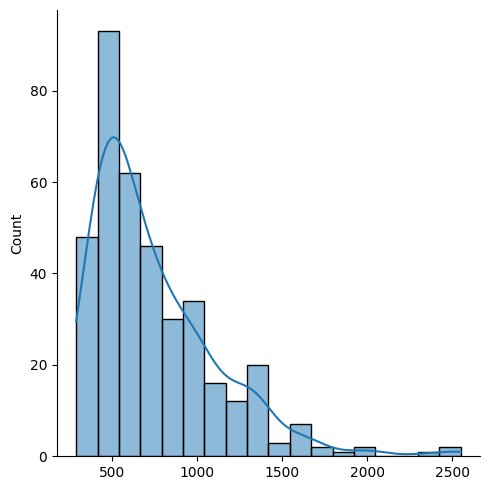

In [11]:
data_length_plot(davis_df["Target"], "Davis_Target")

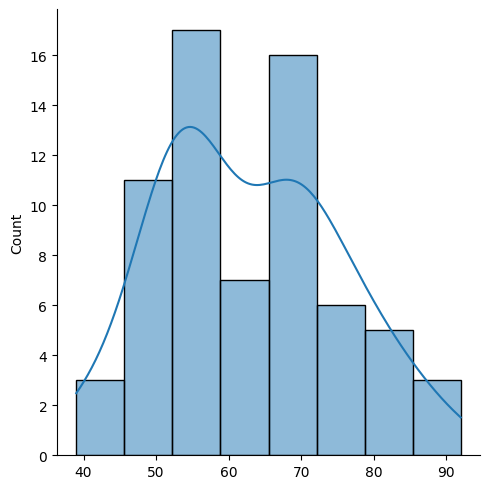

In [12]:
data_length_plot(davis_df["Drug"], "Davis_Drug")

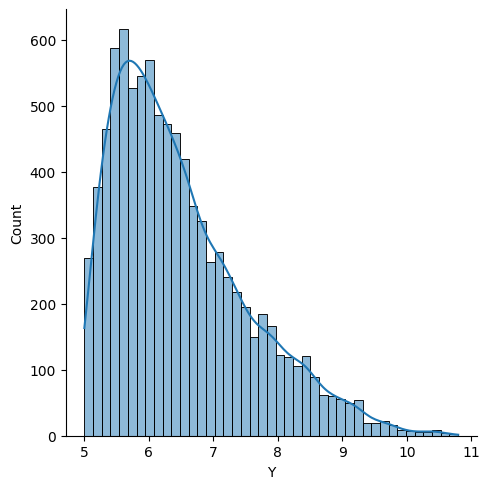

In [13]:
sns.displot(davis_df["Y"], kde=True)